# Look into Point of Interest (POI) data for OSM (OpenStreetMap)

- Created: 2-27-20 by GTP
- Updated: 2-27-20 by GTP

- is OSM a viable datasource for POI data? (we won't be using DnB for a... while... at Ford...)

- This seems to be a good API do to these kinds of data queries: https://lz4.overpass-api.de/

- also good resource: https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0



In [1]:
#import data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

np.random.seed(222)
%matplotlib inline

In [2]:
pd.options.display.max_columns = 120
pd.options.display.max_rows = 120

In [3]:
#import geographic analysis libraries
import geopandas as gp
from geopandas import GeoDataFrame
import shapely as shp
from shapely.geometry import Point
import os
import re
from fiona.crs import from_epsg
#import pysal as ps
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops
import geopy

In [4]:
import requests
import json

In [5]:
### import osm libraries
### library for querying osm data https://python-overpy.readthedocs.io/en/latest/
import overpy

In [6]:
#set crs for entire analysis
crs = {'init': 'epsg:4326'}

In [7]:
data = r'/Users/geoffperrin/Desktop/ford/POI_analysis/data'

In [8]:
api = overpy.Overpass()

### can change amenity via docs here https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL#By_tag_.28has-kv.29

--- also I think this helps... https://overpass-turbo.eu/

### Example from https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/

In [13]:
### amenity list: https://wiki.openstreetmap.org/wiki/Key:amenity

In [9]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [10]:
# Collect coords into list
coords = []
lon_list = []
lat_list = []
name_list = []
for element in data['elements']:
    if element['type'] == 'node':
        try:
            name = element['tags']['name']
        except:
            name = ""
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
        lon_list.append(lon)
        lat_list.append(lat)  
        name_list.append(name)  
    elif 'center' in element:
        try:
            name = element['tags']['name']
        except:
            name = ""
        name = element['tags']['name']
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
        lon_list.append(lon)
        lat_list.append(lat)  
        name_list.append(name)  

In [11]:
bar_df = pd.DataFrame()
bar_df['lon'] = lon_list
bar_df['lat'] = lat_list
bar_df['name'] = name_list

In [12]:
coords

[(6.9939896, 50.5112014),
 (10.8750469, 49.9534891),
 (13.190734, 52.4333644),
 (8.3917604, 50.0110113),
 (8.3903784, 48.9693881),
 (13.1763456, 52.4200885),
 (7.5769021, 50.3638373),
 (8.845254, 52.9822191),
 (10.993033, 49.4814353),
 (7.8558873, 47.9927509),
 (11.5720575, 49.9322248),
 (7.8149142, 48.0124776),
 (11.7554223, 47.9207025),
 (6.9369729, 50.9313358),
 (6.8805055, 51.0910202),
 (10.8848653, 49.6057522),
 (8.0705867, 48.9988621),
 (7.7716977, 53.5733794),
 (8.397165, 49.0014062),
 (8.1927674, 49.0722096),
 (12.0450613, 49.0517594),
 (9.315582, 48.8003651),
 (10.8635908, 50.0612104),
 (11.5855374, 48.149801),
 (13.4389954, 52.4916944),
 (8.1596569, 48.0812535),
 (11.2525293, 48.1827857),
 (11.6000326, 50.8805997),
 (12.3430979, 51.3629651),
 (9.9398521, 48.341065),
 (12.0161756, 49.0426808),
 (12.0294204, 49.0176795),
 (10.8150651, 51.8608757),
 (8.5335935, 50.5434406),
 (9.3178861, 48.6620761),
 (6.9490882, 50.9684636),
 (13.809103, 51.052279),
 (10.9307287, 49.6696258),
 (

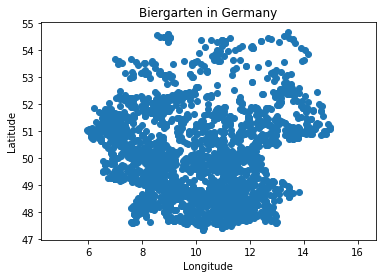

In [14]:

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

### Example from Detroit
- double checked with https://overpass-turbo.eu/
- trouble with the area part of the query...

In [19]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area
  ["name" = "Detroit"];
(node["amenity"="bar"](area);
 way["amenity"="bar"](area);
 rel["amenity"="bar"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [20]:
# Collect coords into list
coords = []
lon_list = []
lat_list = []
name_list = []
for element in data['elements']:
    if element['type'] == 'node':
        try:
            name = element['tags']['name']
        except:
            name = ""
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
        lon_list.append(lon)
        lat_list.append(lat)  
        name_list.append(name)  
    elif 'center' in element:
        try:
            name = element['tags']['name']
        except:
            name = ""
        name = element['tags']['name']
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
        lon_list.append(lon)
        lat_list.append(lat)  
        name_list.append(name)  

In [17]:
bar_df = pd.DataFrame()
bar_df['lon'] = lon_list
bar_df['lat'] = lat_list
bar_df['name'] = name_list

In [21]:
bar_df

,lon,lat,name
0,-83.029900,42.366300,Ben's
1,-83.042466,42.333740,Bouzouki Lounge
2,-83.051808,42.329025,Anchor Bar
3,-83.050304,42.328375,Ciccarelli's Sports Bar
4,-83.048138,42.329047,Capitol Square Nightclub
5,-83.075790,42.331592,The Sugar House
6,-83.046781,42.329634,Buhl Bar
7,-83.079473,42.331149,Two James Spirits
8,-82.996737,42.355359,Craft Work
9,-83.053034,42.334869,Coach's Corner


## Geocoding Example

In [22]:
### geocoding from OSM

from geopy.geocoders import Nominatim

In [23]:
nom = Nominatim()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [31]:
n = nom.geocode("Golden Gate Bridge")

In [32]:
n

Location(Golden Gate Bridge, San Francisco, San Francisco City and County, California, 94129, United States of America, (37.8303213, -122.4797496, 0.0))

In [33]:
print(n.latitude, n.longitude)

37.8303213 -122.4797496
